In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
#宣告12*35的空白矩陣
Char = np.zeros([12,35])
#A
Char[0] = np.array([0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1])
#B
Char[1] = np.array([1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0])
#C
Char[2] = np.array([0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0])
#D
Char[3] = np.array([1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,1,0,0])
#E
Char[4] = np.array([1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1])
#F
Char[5] = np.array([1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0])
#G
Char[6] = np.array([0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,1,1,0])
#H
Char[7] = np.array([1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1])
#I
Char[8] = np.array([0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0])
#J
Char[9] = np.array([0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0])
#K
Char[10] = np.array([1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1])
#L
Char[11] = np.array([1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1])

In [118]:
class SOM(object):
    def __init__(self,iteration,learning_rate,R0):
        #iteration:迭代次數
        self.iteration = iteration
        #權重：4*4*35亂數矩陣
        self.w = np.random.random((4,4,35))
        #learning_rate:學習數率
        self.learning_rate = learning_rate
        #R0：初始鄰近半徑
        self.R0 = R0
        self.R = R0
        
    def winner(self,x):
        #winner屬於4*4矩陣
        winner = np.zeros([4,4])
        #根據公式設置迴圈
        for i in np.arange(0,4):
            for j in np.arange(0,4):
                winner[i,j] = np.sum((x-self.w[i,j])**2)
        #min_d=winner中與輸入最相近的神經元
        min_d = np.min(winner)
        #min_where=min_d的位置
        min_where = np.where(winner == min_d)[0]
        return min_where
    
    def getneighbor(self,index):
        #神經元與優勝神經元的關係函數
        h = np.zeros([4,4])
        for i in np.arange(0,4):
            for j in np.arange(0,4):
                h[i,j] = np.exp(-np.sum(([i,j]-index)**2)/(2*self.R**2))
        return h
    
    def update_w(self,x,h):
        #4*4個神經元中每個有35個權重值，因此設置4*4*35空矩陣
        delta_w = np.zeros([4,4,35])
        #根據公式設置迴圈
        for i in np.arange(0,4):
            for j in np.arange(0,4):
                delta_w[i,j,:] = self.learning_rate*h[i,j]*(x-self.w[i,j])
        #更新權重值
        self.w=self.w+delta_w
    
    def geteta(self,k):
        #根據公式
        self.learning_rate = self.learning_rate*np.exp(-k/self.iteration)
    
    def updateR(self,k):
        #根據公式
        self.R = self.R0*np.exp(-k*np.log(self.R0)/self.iteration)
    

In [119]:
#迭代次數2000次，學習率0.5，初始半徑0.5
som = SOM(2000,0.5,0.5)
for k in np.arange(0,2000):
    for num in np.arange(0,12):
        min_where = som.winner(Char[num])
        h = som.getneighbor(min_where)
        som.update_w(Char[num],h)
        som.geteta(k)
        som.updateR(k)
print(som.w)

[[[1.88707318e-02 6.76848787e-06 1.24018154e-05 9.81128675e-01
   1.88877461e-02 1.88730981e-02 3.07719643e-05 1.09698187e-05
   9.99985841e-01 6.47569260e-06 1.88768896e-02 2.02626016e-05
   1.88767154e-02 9.81120121e-01 1.36799532e-05 1.88689265e-02
   1.88842079e-02 3.03043471e-05 9.81131325e-01 6.21449618e-06
   1.88882212e-02 2.97826854e-05 1.88731471e-02 9.81116080e-01
   4.54809490e-06 9.99980865e-01 1.52622020e-05 2.64421695e-05
   9.99995337e-01 8.75800014e-07 9.99975576e-01 9.81131174e-01
   9.81121637e-01 9.81129539e-01 1.88928267e-02]
  [3.65671720e-01 8.41442152e-03 1.04329980e-01 6.03215515e-01
   5.21651584e-01 4.38645879e-01 7.72838584e-02 5.47029868e-02
   9.78303995e-01 9.20174546e-02 3.95134602e-01 4.58987332e-02
   3.98174292e-01 6.29315002e-01 1.30396365e-01 4.15962212e-01
   4.29425143e-01 8.89180567e-02 5.31125286e-01 8.29789999e-02
   4.24494273e-01 1.07852309e-01 4.20050656e-01 6.05804232e-01
   1.01817010e-01 8.69234087e-01 6.33763375e-02 1.39513982e-01
   9.3

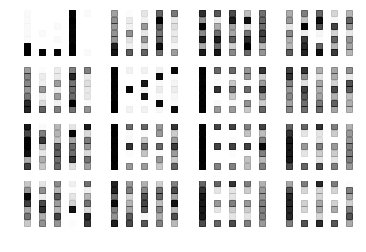

In [120]:
plt.figure()
ax1 = plt.subplot2grid((4,4),(0,0))
ax2 = plt.subplot2grid((4,4),(0,1))
ax3 = plt.subplot2grid((4,4),(0,2))
ax4 = plt.subplot2grid((4,4),(0,3))
ax5 = plt.subplot2grid((4,4),(1,0))
ax6 = plt.subplot2grid((4,4),(1,1))
ax7 = plt.subplot2grid((4,4),(1,2))
ax8 = plt.subplot2grid((4,4),(1,3))
ax9 = plt.subplot2grid((4,4),(2,0))
ax10 = plt.subplot2grid((4,4),(2,1))
ax11 = plt.subplot2grid((4,4),(2,2))
ax12 = plt.subplot2grid((4,4),(2,3))
ax13 = plt.subplot2grid((4,4),(3,0))
ax14 = plt.subplot2grid((4,4),(3,1))
ax15 = plt.subplot2grid((4,4),(3,2))
ax16 = plt.subplot2grid((4,4),(3,3))
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
ax7.axis('off')
ax8.axis('off')
ax9.axis('off')
ax10.axis('off')
ax11.axis('off')
ax12.axis('off')
ax13.axis('off')
ax14.axis('off')
ax15.axis('off')
ax16.axis('off')

counter = 0
for i in np.array([6,5,4,3,2,1,0]):
    for j in np.arange(0,5):
        ax1.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[0,0,counter],2))
        ax2.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[0,1,counter],2))
        ax3.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[0,2,counter],2))
        ax4.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[0,3,counter],2))
        ax5.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[1,0,counter],2))
        ax6.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[1,1,counter],2))
        ax7.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[1,2,counter],2))
        ax8.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[1,3,counter],2))
        ax9.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[2,0,counter],2))
        ax10.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[2,1,counter],2))
        ax11.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[2,2,counter],2))
        ax12.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[2,3,counter],2))
        ax13.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[3,0,counter],2))
        ax14.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[3,1,counter],2))
        ax15.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[3,2,counter],2))
        ax16.scatter(j,i,marker='s',color='black',alpha=np.round(som.w[3,3,counter],2))
        counter = counter + 1
        